## Gender Classification using different models

Dataset acquired from https://www.kaggle.com/hb20007/gender-classification?select=Transformed+Data+Set+-+Sheet1.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("genderdataset.csv")

In [3]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [5]:
data['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [6]:
data['Favorite Music Genre'].unique()

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [7]:
data['Favorite Beverage'].unique()

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [8]:
data['Favorite Soft Drink'].unique()

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [9]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

## Encoding Categorical Data

In [10]:
encoded = pd.get_dummies(data)
encoded = encoded.to_numpy()


data['Favorite Color'] = data['Favorite Color'].replace(['Cool'],'1')
data['Favorite Color'] = data['Favorite Color'].replace(['Neutral'],'2')
data['Favorite Color'] = data['Favorite Color'].replace(['Warm'],'3')

data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Rock'],'1')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Hip hop'],'2')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Folk/Traditional'],'3')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Jazz/Blues'],'4')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Pop'],'5')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['Electronic'],'6')
data['Favorite Music Genre'] = data['Favorite Music Genre'].replace(['R&B and soul'],'7')

data['Favorite Beverage'] = data['Favorite Beverage'].replace(['Vodka'],'1')
data['Favorite Beverage'] = data['Favorite Beverage'].replace(['Wine'],'2')
data['Favorite Beverage'] = data['Favorite Beverage'].replace(['Whiskey'],'3')
data['Favorite Beverage'] = data['Favorite Beverage'].replace(["Doesn't drink"],'4')
data['Favorite Beverage'] = data['Favorite Beverage'].replace(['Beer'],'5')
data['Favorite Beverage'] = data['Favorite Beverage'].replace(['Other'],'6')

data['Favorite Soft Drink'] = data['Favorite Soft Drink'].replace(['7UP/Sprite'],'1')
data['Favorite Soft Drink'] = data['Favorite Soft Drink'].replace(['Coca Cola/Pepsi'],'2')
data['Favorite Soft Drink'] = data['Favorite Soft Drink'].replace(['Fanta'],'3')
data['Favorite Soft Drink'] = data['Favorite Soft Drink'].replace(['Other'],'4')

data['Gender'] = data['Gender'].replace(['M'],'1')
data['Gender'] = data['Gender'].replace(['F'],'2')
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,1,2
1,2,2,1,2,2
2,3,1,2,2,2
3,3,3,3,3,2
4,1,1,1,2,2


In [11]:
dependent = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']
df = data[dependent]
y = data["Gender"]

df.shape

(66, 4)

In [12]:
y.shape

(66,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

# Naive bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [15]:
from sklearn import metrics
predicted = clf.predict(X_test)
NB = metrics.accuracy_score(y_test, predicted)
print("Accuracy:",NB)

Accuracy: 0.42857142857142855


## K- Nearest Neighbour

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [17]:
predicted2 = neigh.predict(X_test)
KNN = metrics.accuracy_score(y_test, predicted2)
print("Accuracy:",KNN)

Accuracy: 0.6428571428571429


## Simple Neural Net

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
snn = Sequential()
snn.add(Dense(16, input_dim=20, activation='relu'))
snn.add(Dense(22, activation='relu'))
snn.add(Dense(12, activation='relu'))
snn.add(Dense(2, activation='softmax'))

In [19]:
snn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
snn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                374       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                276       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 1,012
Trainable params: 1,012
Non-trainable params: 0
_________________________________________________________________


In [21]:
df=encoded[:,:-2]
y=encoded[:,-2:]
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [22]:
test = snn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=150, batch_size=64)

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.7150 - val_accuracy: 0.4286
Epoch 2/150
1/1 [==============================] - 0s 25ms/step - loss: 0.6809 - accuracy: 0.5769 - val_loss: 0.7105 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 0s 25ms/step - loss: 0.6720 - accuracy: 0.6346 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 24ms/step - loss: 0.6641 - accuracy: 0.6731 - val_loss: 0.7016 - val_accuracy: 0.5714
Epoch 5/150
1/1 [==============================] - 0s 23ms/step - loss: 0.6582 - accuracy: 0.6731 - val_loss: 0.6996 - val_accuracy: 0.5714
Epoch 6/150
1/1 [==============================] - 0s 24ms/step - loss: 0.6530 - accuracy: 0.6731 - val_loss: 0.6981 - val_accuracy: 0.5714
Epoch 7/150
1/1 [==============================] - 0s 22ms/step - loss: 0.6489 - accuracy: 0.7500 - val_loss: 0.6970 - val_accuracy: 0.5714
Epoch 8/150
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.4913 - accuracy: 0.9038 - val_loss: 0.6552 - val_accuracy: 0.7143
Epoch 60/150
1/1 [==============================] - 0s 24ms/step - loss: 0.4876 - accuracy: 0.9038 - val_loss: 0.6576 - val_accuracy: 0.7143
Epoch 61/150
1/1 [==============================] - 0s 24ms/step - loss: 0.4841 - accuracy: 0.9038 - val_loss: 0.6528 - val_accuracy: 0.7143
Epoch 62/150
1/1 [==============================] - 0s 22ms/step - loss: 0.4805 - accuracy: 0.9038 - val_loss: 0.6547 - val_accuracy: 0.7143
Epoch 63/150
1/1 [==============================] - 0s 23ms/step - loss: 0.4770 - accuracy: 0.9038 - val_loss: 0.6516 - val_accuracy: 0.7143
Epoch 64/150
1/1 [==============================] - 0s 23ms/step - loss: 0.4729 - accuracy: 0.9038 - val_loss: 0.6516 - val_accuracy: 0.7143
Epoch 65/150
1/1 [==============================] - 0s 22ms/step - loss: 0.4691 - accuracy: 0.9038 - val_loss: 0.6493 - val_accuracy: 0.7143
Epoch 66/150
1/1 [========

1/1 [==============================] - 0s 24ms/step - loss: 0.2640 - accuracy: 0.9615 - val_loss: 0.6630 - val_accuracy: 0.7143
Epoch 118/150
1/1 [==============================] - 0s 22ms/step - loss: 0.2604 - accuracy: 0.9615 - val_loss: 0.6657 - val_accuracy: 0.7143
Epoch 119/150
1/1 [==============================] - 0s 23ms/step - loss: 0.2565 - accuracy: 0.9615 - val_loss: 0.6668 - val_accuracy: 0.7143
Epoch 120/150
1/1 [==============================] - 0s 22ms/step - loss: 0.2525 - accuracy: 0.9615 - val_loss: 0.6702 - val_accuracy: 0.7143
Epoch 121/150
1/1 [==============================] - 0s 22ms/step - loss: 0.2486 - accuracy: 0.9615 - val_loss: 0.6723 - val_accuracy: 0.7143
Epoch 122/150
1/1 [==============================] - 0s 23ms/step - loss: 0.2448 - accuracy: 0.9615 - val_loss: 0.6757 - val_accuracy: 0.7143
Epoch 123/150
1/1 [==============================] - 0s 24ms/step - loss: 0.2412 - accuracy: 0.9615 - val_loss: 0.6768 - val_accuracy: 0.7143
Epoch 124/150
1/1 [=

In [23]:
test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

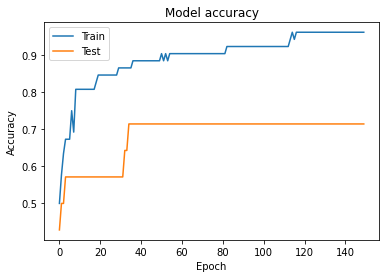

In [24]:
import matplotlib.pyplot as plt
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

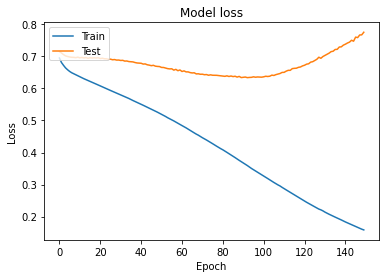

In [25]:
plt.plot(test.history['loss']) 
plt.plot(test.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [26]:
NN = test.history['accuracy'][149]

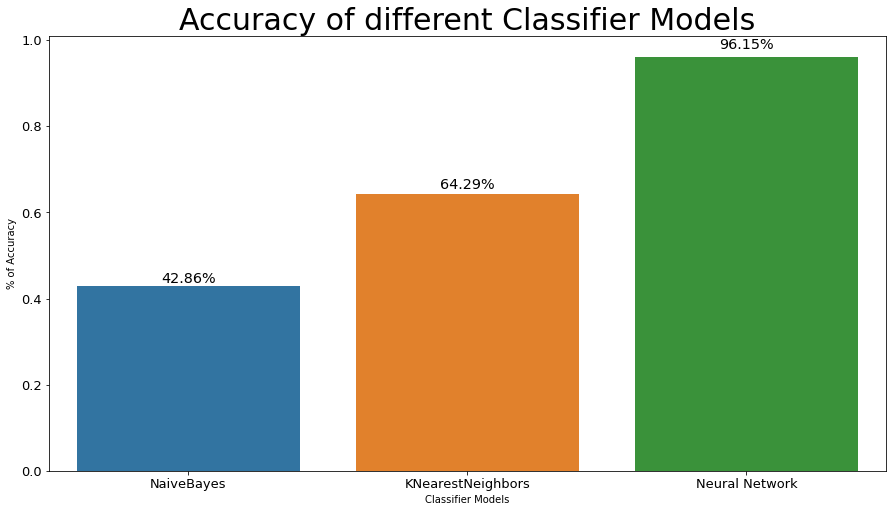

In [33]:
# Visualising the accuracy score of each classification model
models = ['NaiveBayes','KNearestNeighbors','Neural Network']
accuracys = [NB,KNN,NN]

plt.rcParams['figure.figsize']=15,8 
ax = sns.barplot(x=models, y=accuracys)
plt.xlabel("Classifier Models")
plt.ylabel("% of Accuracy")
plt.title("Accuracy of different Classifier Models",fontsize = 30)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### Conclusion:
The Neural network has the best accuracy of 96% and would be the best suited to predict gender base on the features:

'Favorite Color',
'Favorite Music Genre',
'Favorite Beverage',
'Favorite Soft Drink'.